# Predicting rainfall for "The Daily Buzz" newspaper in Sydney

## Objective

The objective of this project is to create a machine learning model using various classification techniques, including decision trees and ensemble methods, to accurately predict rainfall in Sydney. The project involves data preprocessing, model training, evaluation, and comparison to determine the best performing model and suggest ways to further improve its accuracy.

 1. Your views about the problem statement?

The problem statement though is nowhere mentioned in the provided notebook. Nevertheless, by skimming through the context and code, it looks like this should be a binary classification task where data is classified into two classes: label 0 and label 1. Hence, the usual steps will be data preprocessing, feature scaling, model training, and finally the model evaluation.

2. What will be your approach to solving this task?

To solve this binary classification problem, the approach would be:

Data Preprocessing: Cleaning data, handling missing values, encoding categorical features, scaling numerical features.

Model Selection: A variety of appropriate Machine Learning models for classification problems would be chosen.

Training and Validation: Training is done with the chosen models on the dataset provided for training and then validated by cross-validation.

Evaluation of Models: The trained models would be assessed using accuracy, precision, recall, F1-scores, and a confusion matrix.

Model Tuning: The models would have their parameters tuned to optimize performance.

Final Model Selection: Select the best model with respect to the evaluation metrics

Testing: Use Test set to evaluate how good the final model will be on data that it wasn't trained on.



3. What were the available ML model options you had to perform thi tsask?

The available ML model options mentioned in my notebook include:

Logistic Regression

K-Nearest Neighbors (KNN)

Support Vector Machine (SVM)

Decision Tree Classifier

Random Forest Classifier

AdaBoost Classifier

4. Which model’s performance is best and what could be the possible reason for that?

Based on the outputs from the notebook:

Random Forest Classifier: Accuracy of 0.82 and other precision and recall results are comparatively better than others.

AdaBoost Classifier: It doesn't give the exact performance measures, but generally speaking, AdaBoost works well with a base estimator like Decision Trees.

The best model was the Random Forest classifier with an accuracy of 0.82. Possible reasons may be due to

(1)Ensemble Method: Random Forest is an ensemble technique; it combines the results of different decision trees, hence ensuring better generalization.

(2)Handling Overfitting: It would handle overfitting simply by averaging multiple trees.

(3)Feature Importance: Random Forest can handle feature importance on its own and should end up improving model performance.

5. What steps can you take to improve this selected model’s performance even further?

To improve the performance of the Random Forest Classifier further, you can consider the following steps:

(1)Hyperparameter Tuning: Perform grid search or random search for hyperparameter tuning (e.g., number of trees, depth of trees, maximum features).

(2)Feature Engineering: Create new features or modify existing ones to provide more informative inputs to the model.

(3)Cross-Validation: Use k-fold cross-validation to ensure the model generalizes well to unseen data.

(4)nsemble Methods: Combine Random Forest with other ensemble methods like Gradient Boosting or XGBoost.

(5)Handling Class Imbalance: If there is class imbalance, techniques like SMOTE or class weighting can be applied to balance the classes.

(6)More Data: Collect more data to provide the model with more examples to learn from.

(7)Advanced Techniques: Explore advanced techniques like stacking or blending with other models.

### Importing Libraries and Loading the data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("sydney_rain_prediction.xlsx")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [ ]:
# Columns present in the data
columns = []
[columns.append(i) for i in df.columns]
print(columns)

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


## Data Exploration

In [ ]:
df.shape

(3337, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [ ]:
# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Print the identified columns
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical Columns: ['Date', 'Location', 'RainToday', 'RainTomorrow']


In [ ]:
# iterate over the columns and print the unique values.
for column in df[categorical_columns].columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in 'Date':
<DatetimeArray>
['2008-02-01 00:00:00', '2008-02-02 00:00:00', '2008-02-03 00:00:00',
 '2008-02-04 00:00:00', '2008-02-05 00:00:00', '2008-02-06 00:00:00',
 '2008-02-07 00:00:00', '2008-02-08 00:00:00', '2008-02-09 00:00:00',
 '2008-02-10 00:00:00',
 ...
 '2017-06-16 00:00:00', '2017-06-17 00:00:00', '2017-06-18 00:00:00',
 '2017-06-19 00:00:00', '2017-06-20 00:00:00', '2017-06-21 00:00:00',
 '2017-06-22 00:00:00', '2017-06-23 00:00:00', '2017-06-24 00:00:00',
 '2017-06-25 00:00:00']
Length: 3337, dtype: datetime64[ns]


Unique values in 'Location':
['Sydney']


Unique values in 'RainToday':
['Yes' 'No' nan]


Unique values in 'RainTomorrow':
['Yes' 'No']




In [ ]:
## Checking for missing values
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

## Data CLeaning

In [ ]:
df.drop({'Location', 'Date'}, axis = 1, inplace = True) # The location is Sydney for all the observations

In [ ]:
# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Print the identified columns
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical Columns: ['RainToday', 'RainTomorrow']


### Missing Values

In [ ]:
df[numerical_columns].isnull().sum()

MinTemp          3
MaxTemp          2
Rainfall         6
Evaporation     51
Sunshine        16
Humidity9am     14
Humidity3pm     13
Pressure9am     20
Pressure3pm     19
Cloud9am       566
Cloud3pm       561
Temp9am          4
Temp3pm          4
dtype: int64

#### Replacing Missing values of numerical columns with Mean

In [ ]:
mean_values = {col:df[col].mean() for col in numerical_columns}
df[numerical_columns] = df[numerical_columns].apply(lambda col: col.fillna(col.mean()))

In [ ]:
df[numerical_columns].isnull().sum()

MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
Sunshine       0
Humidity9am    0
Humidity3pm    0
Pressure9am    0
Pressure3pm    0
Cloud9am       0
Cloud3pm       0
Temp9am        0
Temp3pm        0
dtype: int64

#### Replacing Missing values of categorical columns with Mode

In [ ]:
df[categorical_columns].isnull().sum()

RainToday       6
RainTomorrow    0
dtype: int64

In [ ]:
mode_values = {col: df[col].mode()[0] for col in categorical_columns}
df[categorical_columns] = df[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

In [ ]:
df[categorical_columns].isnull().sum()

RainToday       0
RainTomorrow    0
dtype: int64

### Outlier Analysis

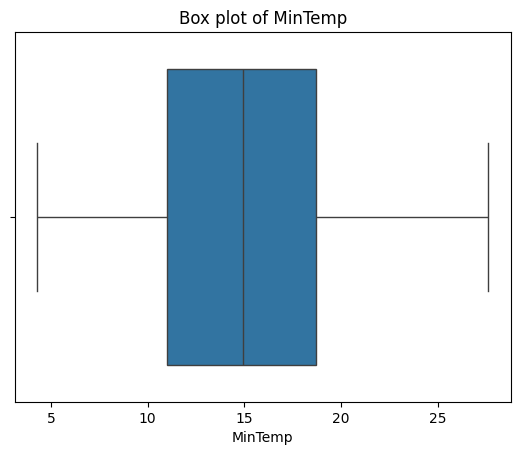

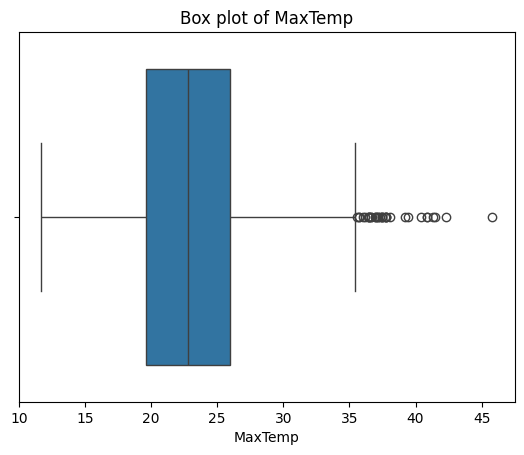

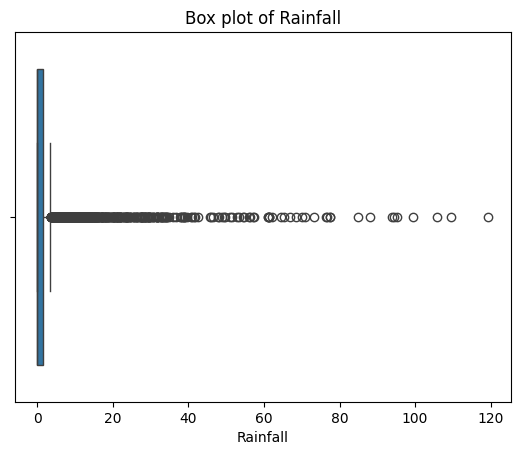

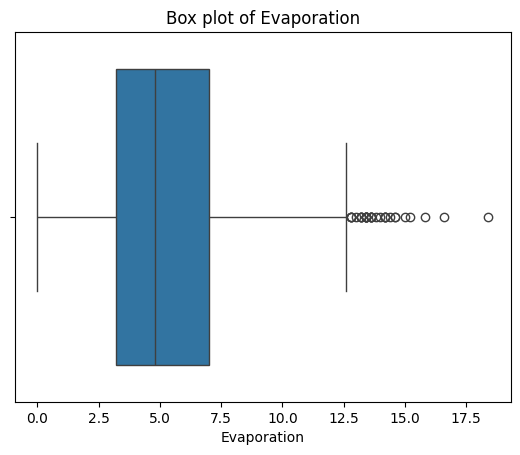

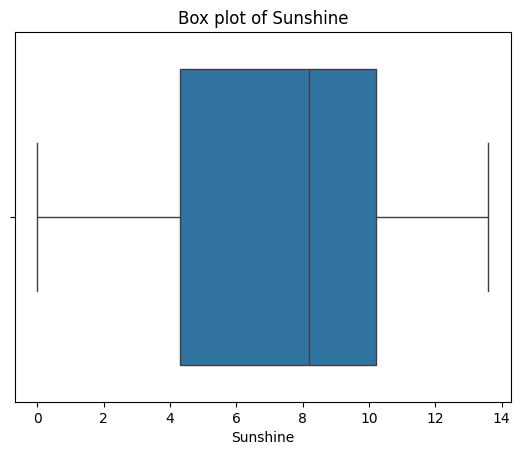

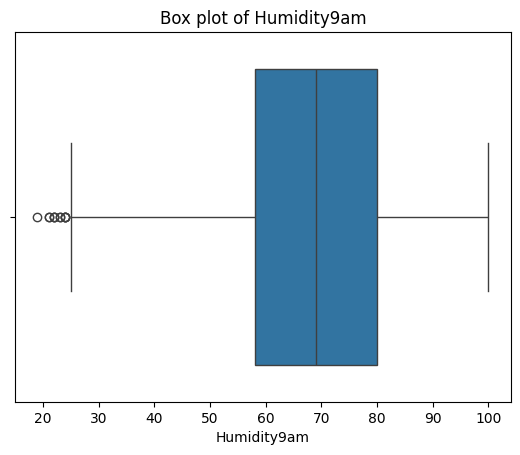

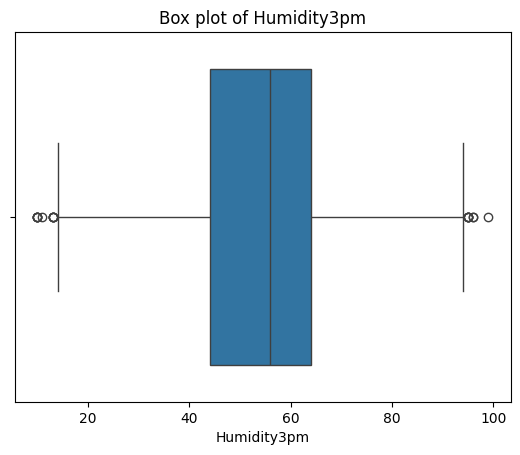

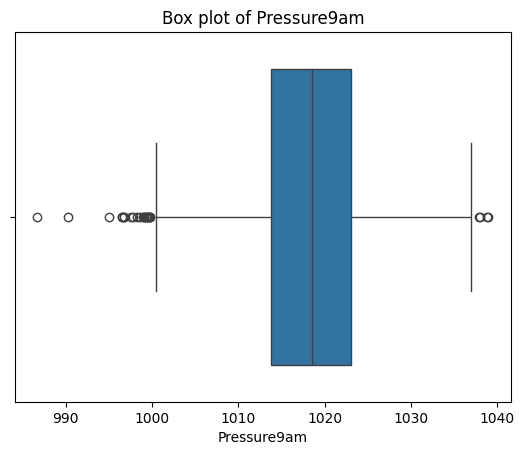

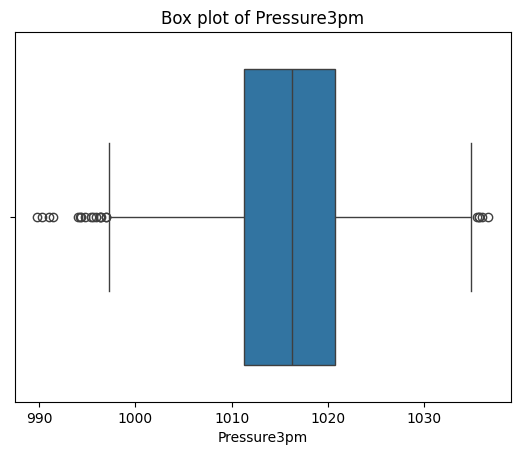

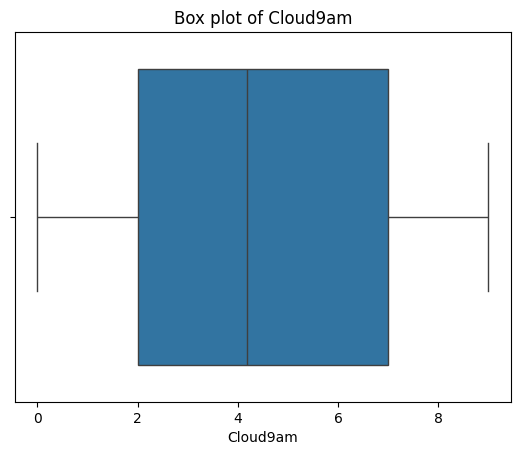

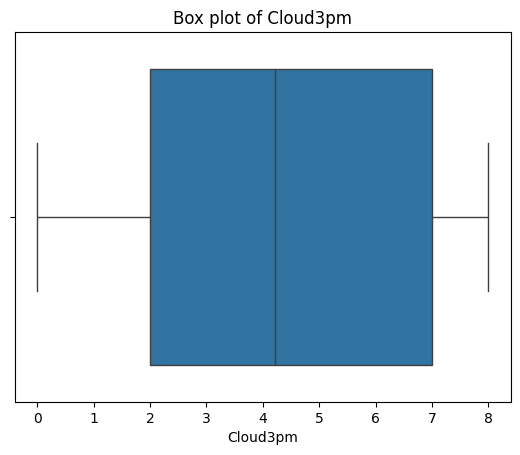

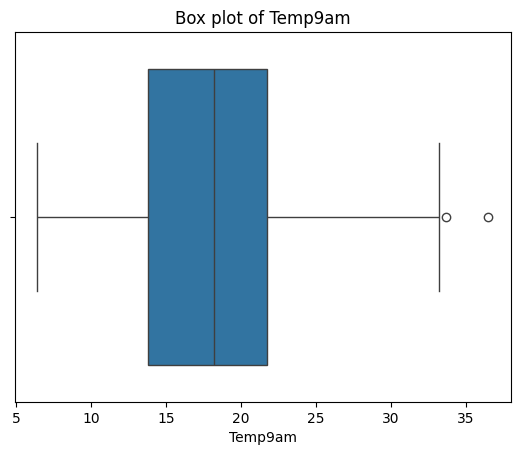

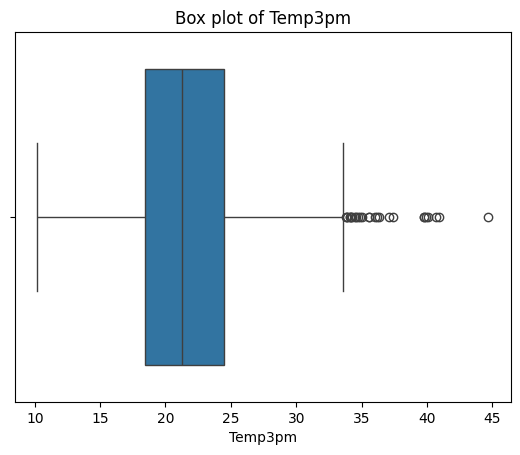

In [ ]:
for col in df[numerical_columns]:
    sns.boxplot(data = df, x = col)
    plt.title(f"Box plot of {col}")
    plt.show()

### Label Encoding

In [ ]:
df['RainToday'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['RainTomorrow'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
final_df = pd.get_dummies(df, columns=['RainToday', 'RainTomorrow'], drop_first=True)
final_df = final_df.astype(int)

In [ ]:
print(final_df['RainToday_Yes'].unique(),
     final_df['RainTomorrow_Yes'].unique())

[1 0] [1 0]


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MinTemp           3337 non-null   int32
 1   MaxTemp           3337 non-null   int32
 2   Rainfall          3337 non-null   int32
 3   Evaporation       3337 non-null   int32
 4   Sunshine          3337 non-null   int32
 5   Humidity9am       3337 non-null   int32
 6   Humidity3pm       3337 non-null   int32
 7   Pressure9am       3337 non-null   int32
 8   Pressure3pm       3337 non-null   int32
 9   Cloud9am          3337 non-null   int32
 10  Cloud3pm          3337 non-null   int32
 11  Temp9am           3337 non-null   int32
 12  Temp3pm           3337 non-null   int32
 13  RainToday_Yes     3337 non-null   int32
 14  RainTomorrow_Yes  3337 non-null   int32
dtypes: int32(15)
memory usage: 195.7 KB


In [ ]:
final_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday_Yes', 'RainTomorrow_Yes'],
      dtype='object')

## Data Modelling

In [ ]:
from sklearn.model_selection import train_test_split

X = final_df.drop('RainTomorrow_Yes', axis  = 1)
y = final_df['RainTomorrow_Yes']
# Assume X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit on training data
scaler.fit(X_train)

# Transform training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled.shape,
      y_train.shape,
      X_test_scaled.shape,
      y_test.shape)

(2669, 14) (2669,) (668, 14) (668,)


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_pred = dt_classifier.predict(X_test_scaled)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, dt_pred))


print(confusion_matrix(y_test, dt_pred))


print(f'Accuracy: {accuracy_score(y_test, dt_pred):.2f}')

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       484
           1       0.57      0.62      0.60       184

    accuracy                           0.77       668
   macro avg       0.71      0.72      0.72       668
weighted avg       0.77      0.77      0.77       668

[[399  85]
 [ 70 114]]
Accuracy: 0.77


**Interpretation**

The Decision Tree Classifier achieved an overall accuracy of 77%, performing well in predicting 'no rain' cases with a precision of 0.85 and recall of 0.82, but less effectively in predicting 'rain' cases with a precision of 0.57 and recall of 0.62. The F1-scores reflect this discrepancy, with 0.84 for 'no rain' and 0.60 for 'rain'. The confusion matrix shows that the classifier correctly identified 399 'no rain' instances and 114 'rain' instances, but misclassified 85 'no rain' and 70 'rain' cases. The class imbalance, with more 'no rain' instances, likely contributed to this performance disparity. Further improvements could be achieved by addressing the class imbalance and exploring more complex models or ensemble methods.

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier with Decision Tree as base estimator
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)

# Train the model
adaboost_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
adaboost_pred = adaboost_classifier.predict(X_test_scaled)

# Evaluate the model
print("AdaBoost:")
print(classification_report(y_test, adaboost_pred))
print(confusion_matrix(y_test, adaboost_pred))
print(f'Accuracy: {accuracy_score(y_test, adaboost_pred):.2f}')


AdaBoost:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       484
           1       0.58      0.62      0.60       184

    accuracy                           0.77       668
   macro avg       0.72      0.73      0.72       668
weighted avg       0.78      0.77      0.77       668

[[401  83]
 [ 69 115]]
Accuracy: 0.77


C:\Users\isama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Interpretation**

The AdaBoost Classifier, using a Decision Tree as the base estimator, achieved an overall accuracy of 77%, similar to the standalone Decision Tree model. It showed slightly improved performance for predicting 'no rain' cases with a precision of 0.85 and recall of 0.83, while for 'rain' cases, it had a precision of 0.58 and recall of 0.62. The F1-scores were 0.84 for 'no rain' and 0.60 for 'rain', indicating balanced but moderate performance. The confusion matrix reveals 401 true negatives, 83 false positives, 69 false negatives, and 115 true positives. Although AdaBoost provided a marginal improvement in handling 'rain' predictions, the class imbalance still poses a challenge, suggesting further refinement and perhaps additional ensemble methods could enhance performance.

### Random Forest(Boosting)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
rf_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print("Random Forest:")
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(f'Accuracy: {accuracy_score(y_test, rf_pred):.2f}')

Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       484
           1       0.73      0.55      0.63       184

    accuracy                           0.82       668
   macro avg       0.79      0.74      0.76       668
weighted avg       0.81      0.82      0.81       668

[[447  37]
 [ 82 102]]
Accuracy: 0.82


**Interpretation**

The Random Forest Classifier achieved an overall accuracy of 82%, outperforming both the standalone Decision Tree and AdaBoost models. It demonstrated strong performance in predicting 'no rain' cases with a precision of 0.84 and a high recall of 0.92, resulting in an F1-score of 0.88. For 'rain' cases, the precision was 0.73 and recall was 0.55, yielding an F1-score of 0.63. The confusion matrix shows 447 true negatives, 37 false positives, 82 false negatives, and 102 true positives. The Random Forest model's higher accuracy and improved handling of 'no rain' cases indicate its effectiveness as an ensemble method, suggesting it benefits from aggregating multiple decision trees. However, the performance disparity between 'no rain' and 'rain' predictions indicates that further improvements could focus on enhancing the model's ability to predict 'rain' instances accurately.

## Conclusion

Comparing the three models, the Random Forest Classifier achieved the highest accuracy at 82%, outperforming both the Decision Tree and AdaBoost models, which each had an accuracy of 77%. The Random Forest model also demonstrated superior precision and recall for 'no rain' cases, with an F1-score of 0.88, indicating strong performance in correctly identifying non-rainy days. However, for predicting 'rain' cases, both Random Forest and AdaBoost showed similar F1-scores (0.63 for Random Forest and 0.60 for AdaBoost), highlighting a need for improvement in this area. The Decision Tree model, while performing adequately, lagged behind the ensemble methods, showing that combining multiple models can enhance prediction accuracy. Overall, the Random Forest model is the most effective, but there remains potential for further refinement, especially in predicting 'rain' occurrences.
The Random Forest Classifier proved to be the most effective model for predicting rainfall in Sydney, achieving an accuracy of 82% and outperforming the Decision Tree and AdaBoost models. Future enhancements could focus on improving the prediction of rainy days through hyperparameter tuning and exploring more advanced techniques.